# CSE151A Group Project Milestone 2

### Data Link: https://huggingface.co/datasets/wykonos/movies/viewer/default/train?sort[column]=popularity&sort[direction]=desc

## Data Exploration

In [ ]:
from datasets import load_dataset
import pandas as pd

X = load_dataset("wykonos/movies")

print(X.shape)

print(X['train'].features.keys())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


movies_dataset.csv:   0%|          | 0.00/350M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/722796 [00:00<?, ? examples/s]

{'train': (722796, 20)}
dict_keys(['id', 'title', 'genres', 'original_language', 'overview', 'popularity', 'production_companies', 'release_date', 'budget', 'revenue', 'runtime', 'status', 'tagline', 'vote_average', 'vote_count', 'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations'])


1. **How many observations does your dataset have?**

  - Our dataset has 722796 observations with 20 features

2. **Describe all columns in your dataset their scales and data distributions. Describe the categorical and continuous variables in your dataset. Describe your target column.**

  - Id - Unique ID for each movie
  - Title - Title of movie in observation
  - Genres - Genre of the movie in the observation
    - Categorical
  - Original language - The language that the movie is in
    - Categorical
  - Overview - Description of what the movie is about
  - Popularity - A scale of how popular a movie was based on votes and views
    - Continuous
    - Range from 0 - 6.68k
    - Mean - 1.8
  - Production Companies - Company who made the film
  - Release Date - When the movie was released
  - Budget - Budget of the film in USD
    - Continuous
    - 686k missing
    - Range from 0 - 5,000,000,000
  - Revenue - How much money the film made
    - Continuous
    - 705,000 missing
  - Runtime - Length of the movie in minutes
    - Continuous
    - 131k missing
    - Mean - 198
  - Status - Has the movie been released, cancelled, unreleased
    - Categorical
  - Tagline - Movie tagline
  - Vote average - Average public voting of the film
    - Range from 1-10
    - Continuous
    - Mean - 2.4
    - 296k missing
  - Vote count - Hoe many votes were counted
    - Continuous
    - 0 - 33k
    - Mean - 27.6
    - 296 missing
  - Credits - Actors in the movie
  - Keywords - Words used to categorize the movie
  - Poster path - link to poster
  - Backdrop path - link to backdrop

  - TARGET: Vote average - We want to be able to predict the how the public will vote on a particular movie, given other attributes

3. **Do you have missing and duplicate values in your dataset?**

  - Yes, there are missing values that have either a 0 or null in every category, number of missing is listed under each feature

##Data Plots

### Dataset Matrix
This is what our dataset looks like.

In [ ]:
moviesDF = pd.DataFrame.from_dict(X['train'])

moviesDF.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,385687,Fast X,Action-Crime-Thriller,en,Over many missions and against impossible odds...,6682.100,Universal Pictures-Original Film-One Race-Perf...,2023-05-17,340000000.0,6.867000e+08,142.0,Released,The end of the road begins.,7.331,1856.0,Vin Diesel-Michelle Rodriguez-Tyrese Gibson-Lu...,sequel-revenge-racing-family-cars,/fiVW06jE7z9YnO4trhaMEdclSiC.jpg,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,19603-445954-697843-603692-781009-502356-74735...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,4.757662e+08,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
3,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,2.690000e+08,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
4,502356,The Super Mario Bros. Movie,Animation-Family-Adventure-Fantasy-Comedy,en,While working underground to fix a water main ...,3859.926,Universal Pictures-Illumination-Nintendo,2023-04-05,100000000.0,1.278767e+09,92.0,Released,None,7.764,4042.0,Chris Pratt-Charlie Day-Anya Taylor-Joy-Jack B...,video game-gorilla-plumber-magic mushroom-anth...,/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg,/2klQ1z1fcHGgQPevbEQdkCnzyuS.jpg,713704-385687-640146-60898-758323-1008005-4935...


### Histograms of Different Attributes
Our data on most of these attributes is skewed toward one end of the graph, except for vote_average, which has an okay looking distribution.

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>]], dtype=object)

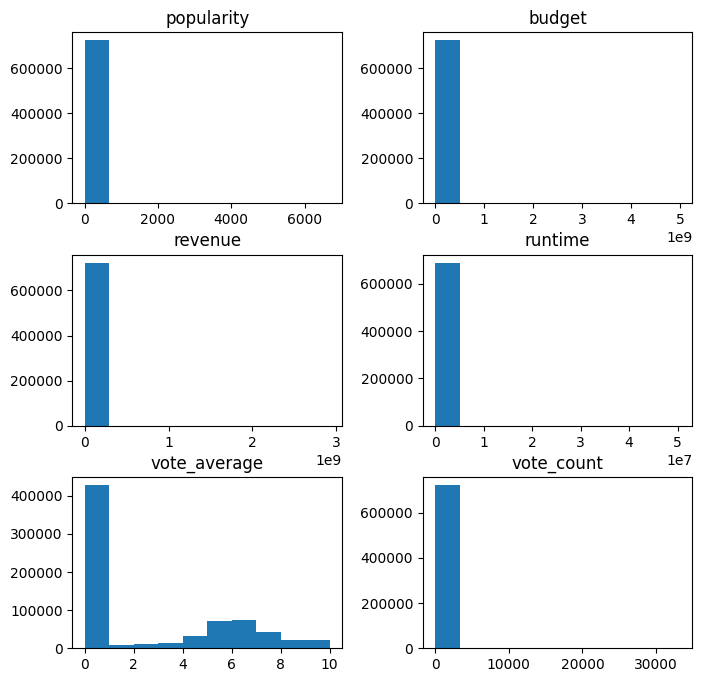

In [ ]:
import numpy as np
import seaborn as sns

moviesDF.drop(columns=['id']).hist(figsize = (8, 8), grid = False)

Applying log scale removes some of the skew, but we may need to consider other data preprocessing methods to explore this data.

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>]], dtype=object)

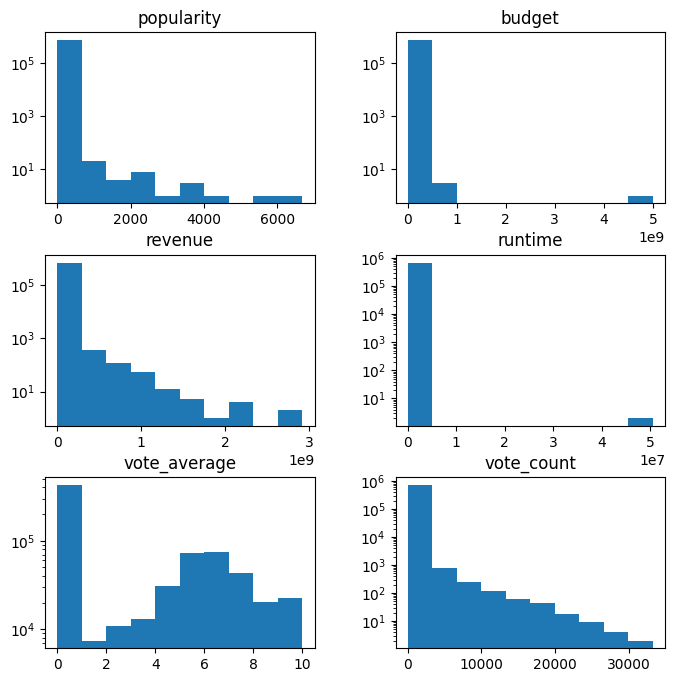

In [ ]:
moviesDF.drop(columns=['id']).hist(figsize = (8, 8), grid = False, log = True)

### Pair Plot of Dataset Attributes
The most interesting plots are as follows:

*   Vote average vs Revenue - People don't seem to give higher or lower ratings to movies that earn more revenue
*   Vote count vs Revenue - These two look like they have some correlation, as the more revenue a movie makes, the more people vote on that movie
*   Vote count vs Vote average - It looks like votes tend to average around a 6 or 7. The amount of people voting skews the votes slightly higher but in the same range.



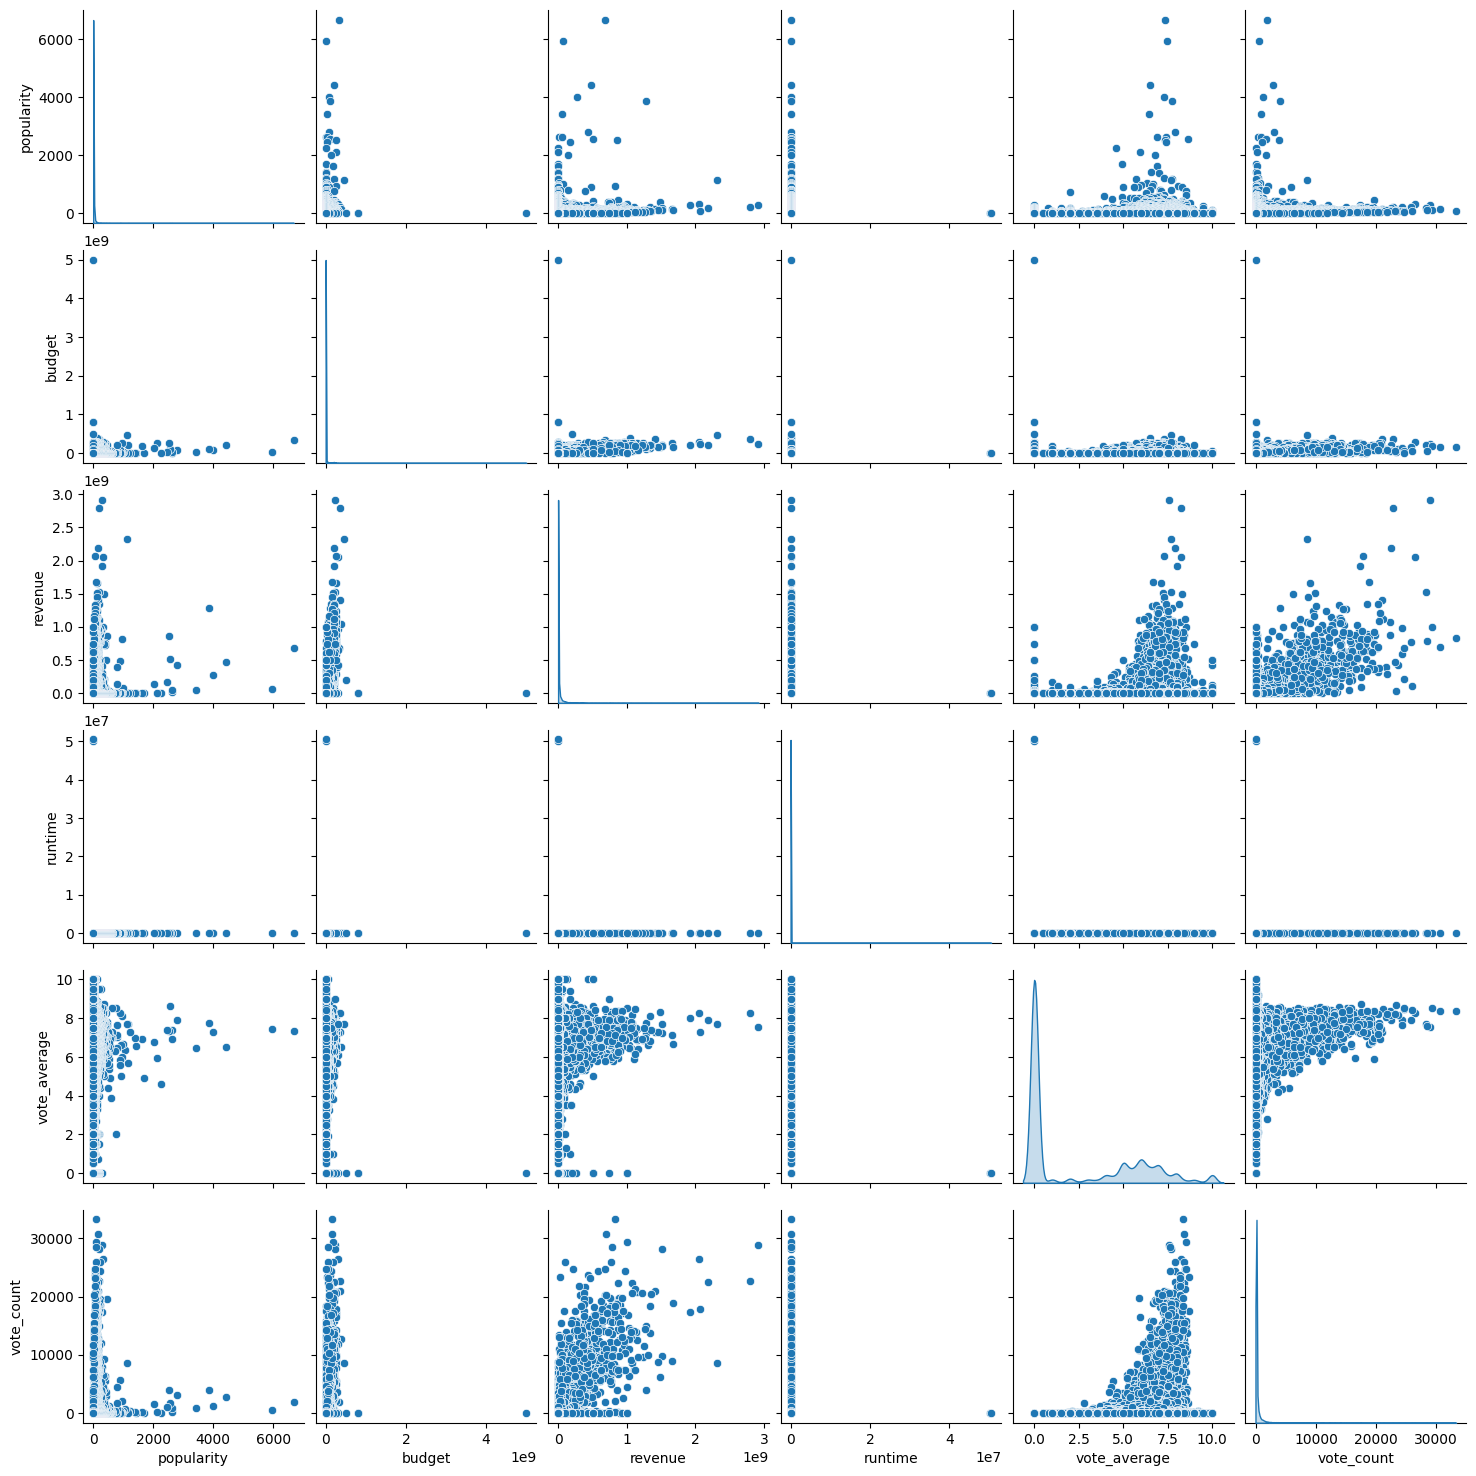

In [ ]:
sns.pairplot(moviesDF.drop(columns=['id']), diag_kind='kde')

<Axes: >

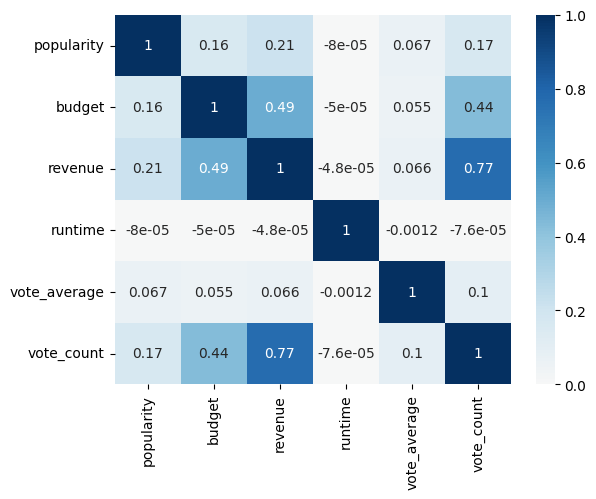

In [ ]:
numDF = moviesDF.drop(columns=['id', 'title', 'genres', 'original_language',	'overview',	'production_companies',	'release_date',	'status',	'tagline',	'credits',	'keywords',	'poster_path',	'backdrop_path',	'recommendations'])
corr = numDF.corr(method='pearson')
sns.heatmap(corr, vmin=0, vmax=1, center=0, annot=True, cmap= 'RdBu')

From this correlation heatmap, we can see which data values are related with one another. We can see that vote average mostly relies on vote count. We need to clean up the data to be able to pull more inferences from the data for vote average.